# <b>CUS 1179 - Assignment 3 - Question 4<b>

#### Task: Write an algorithm in Python to find outliers in a continuous data column labeled Height. Clearly label your steps.

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Read csv file dataset into pandas dataframe
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [16]:
# Get the Height from the dataset
height = df['Height']
height.head()

0    174
1    189
2    185
3    195
4    149
Name: Height, dtype: int64

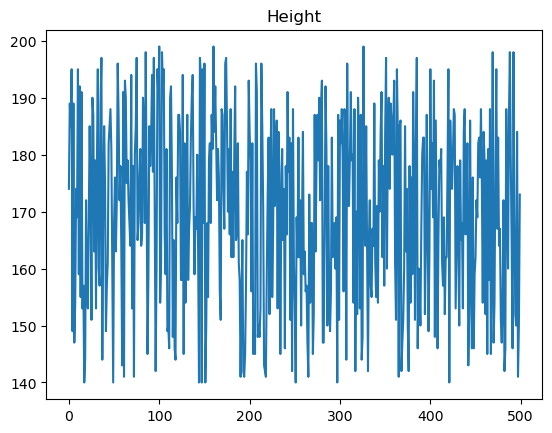

In [24]:
plt.plot(height)
plt.title("Height")
plt.show()

### In statistics we have: <br> Standard Deviation, which is a measure of how dispersed the data is in relation the mean <br> and we have Threshold, which is the Standard Deviation * 1.5
#### Outliers can be defined as points of data that are: <br> Greater than the value of Q3 + threshold <br> AND <br> Less than the value of Q1 - Threshold

In [38]:
# Convert the pandas DataFrame to a NumPy array for statistical calculation
height_data = height.values
print(height_data)

[174 189 185 195 149 189 147 154 174 169 195 159 192 155 191 153 157 140
 144 172 157 153 169 185 172 151 190 187 163 179 153 178 195 160 157 189
 197 144 171 185 175 149 157 161 182 185 188 181 161 140 168 176 163 172
 196 187 172 178 164 143 191 141 193 190 175 179 172 168 164 194 153 178
 141 180 185 197 165 168 176 181 164 166 190 186 168 198 175 145 159 185
 178 183 194 177 197 170 142 160 195 190 199 154 161 198 192 195 166 159
 181 149 150 146 190 192 177 148 165 146 144 176 168 187 187 184 158 158
 194 145 182 154 168 187 158 167 171 183 190 194 171 159 169 167 180 163
 140 197 194 140 195 168 196 140 150 168 155 179 182 168 187 181 199 184
 192 182 172 181 176 156 151 188 187 174 167 196 197 185 170 181 166 188
 162 177 162 180 192 165 167 182 161 158 141 154 165 142 141 145 157 177
 166 193 184 179 156 182 145 150 145 196 191 148 150 148 153 196 185 171
 143 142 141 159 173 183 152 178 188 155 166 188 171 179 186 153 184 177
 145 170 181 165 174 146 178 166 191 177 183 151 18

In [44]:
# Calculate the 25th and 75th percentiles
mean = height_data.mean()
std = height_data.std()
Q1 = np.percentile(height_data, 25)
Q3 = np.percentile(height_data, 75)
IQR = Q3 - Q1

# Print all the values
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

Mean: 169.944
Standard Deviation: 16.35887722308594
Q1: 156.0
Q3: 184.0
IQR: 28.0


In [46]:
# Initialize threshold
threshold = 1.5 * std
# Calculate and print outliers
outliers = height_data[(height_data > mean + threshold) | (height_data < mean - threshold)]
print(outliers)


[195 195 140 144 195 197 144 140 196 143 141 141 197 198 145 197 142 195
 199 198 195 144 145 140 197 140 195 196 140 199 196 197 141 142 141 145
 145 145 196 196 143 142 141 145 142 140 141 145 140 144 196 142 144 199
 142 197 195 141 142 142 197 195 195 140 143 145 145 198 195 142 198 198
 141]
